<a href="https://colab.research.google.com/github/JSheleg/ut_austin_aiml_cert/blob/main/Sheleg_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [ ]:
# Installing the libraries with the specified version.|
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
df = pd.read_csv("/content/drive/MyDrive/UT_Austin_ML/project1_foodhub/foodhub_order.csv")

In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Get Shape of Data
df.shape
print("There are", df.shape[0], 'rows and', df.shape[1], 'columns')

There are 1898 rows and 9 columns


#### Observations:
* There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Get the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are 5 numerical columns of datatypes ints and floats in the data and 4 object type columns either of type string or mixed
* order_id is a unique identifier and should be of type object - order_id is specific to order
* customer_id is a unique identifier and should be of type object - can have same customer_ids with multiple order_ids



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# view columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# confirm no nulls
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
# Looking at dtypes that might not be correct.
# Ratings are showing as object.
df.rating.unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
order_id_unique = df.order_id.unique()
order_id_unique

array([1477147, 1477685, 1477070, ..., 1477819, 1477513, 1478056])

In [ ]:
len(order_id_unique)

1898

In [ ]:
cus_id_unique = df.customer_id.unique()
cus_id_unique

array([337525, 358141,  66393, ...,  97838, 292602, 397537])

In [ ]:
len(cus_id_unique)

1200

In [ ]:
# Check for any duplicated orders -- would be indicated with an order_id being listed more than once
df.duplicated().sum()

0

#### Observations:
* There are no missing values nor is there duplicated values
* The data contains 1898 rows of data.
* There is a few columns that would work to be typed as objects (customer_id and order_id). The analysis shows that there is an unique order_id for each order, but that there can be multiple orders for a customer_id.
* Ratings while not having missing data could benefit from converting the 'Not given' value to np.nan to convert ratings to numerical types to allow for the statistics of ratings.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Describe and Transpose Data to be more readable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


In [ ]:
# Set float format to display numbers without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
* `food_preparation_time`: Minimum preparation for orders is 20 minutes, and maximum preparation is 35 minutes. The average prepartion is 27.3719 minutes.
* This means that on average it takes 27.3719 minutes to prepare the food across all cuisines



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Find unique values of Rating Column
df.rating.unique()


array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# Sum counts of unique values
ratings = df.rating.value_counts()
ratings

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
# Locate the rating 'Not given'
nan_value = ratings.loc["Not given"]
nan_value

736

In [ ]:
# What percentage of ratings were Not given
total_orders = df.shape[0]
percentage_not_rated = round((nan_value / total_orders) * 100, 2)
percentage_not_rated

38.78

#### Observations:
* There are 736 orders not being rated.
* This comes out to 38.78 percent of the orders not being rated. That is a large amount of orders not being rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# Categorical Variables
cat_cols = [ 'order_id','customer_id', 'restaurant_name','cuisine_type', 'day_of_the_week', 'rating']
# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

order_id
1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: count, Length: 1898, dtype: int64
--------------------------------------------------
customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64
--------------------------------------------------
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
--------------------------------------------------
cuisine_type
American          584
Japanes

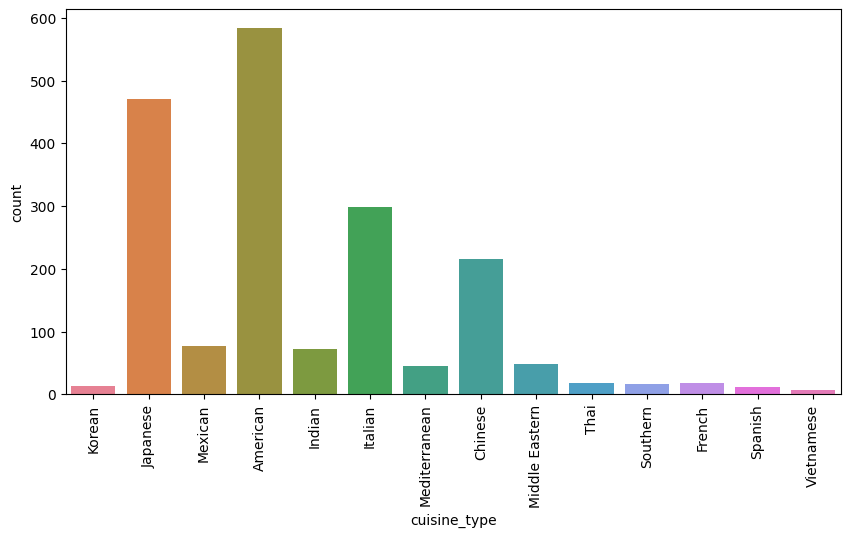

In [ ]:
# Restaurants per Cuisine Type
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cuisine_type', hue='cuisine_type')
plt.xticks(rotation=90)
plt.show()

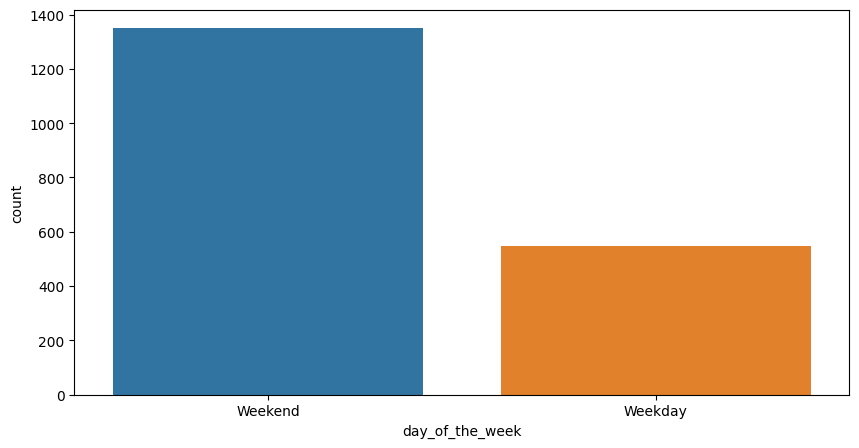

In [ ]:
# Orders for Days of the Week
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week')
plt.show()

####  Categorical Observations:
* There has been 1898 orders placed by 1200 customers
* There are 178 restaurants being ordered from.
* Top 5 restaurants:
    1. Shake Shack                  219
    2. The Meatball Shop            132
    3. Blue Ribbon Sushi            119
    4. Blue Ribbon Fried Chicken     96
    5. Parm                          68
* There are 14 different categories of cuisine
* Top 5 cuisines:
    1. American          584
    2. Japanese          470
    3. Italian           298
    4. Chinese           215
    5. Mexican            77
* Of the 1898 orders, 1351 orders were ordered on the weekend (Sat & Sun) while only 547 orders were ordered on the weekday (Monday - Friday)
* The orders on the weekend are significanly more than the orders during the weekday indicating that users tend to use the service more on the weekend.

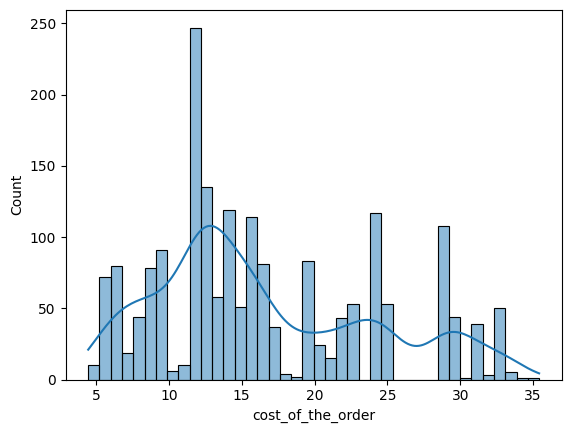

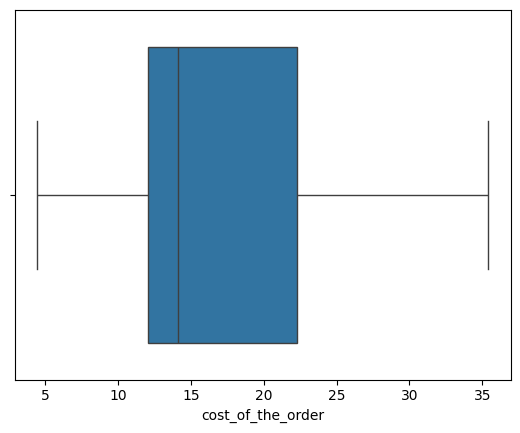

In [ ]:
# Cost of orders
sns.histplot(data=df, x='cost_of_the_order', bins=40, kde=True)
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

#### Order Observations:
* The cost of the order is right skewed with orders tending to be on the lower end of the costs
* There are no outliers indicated on the boxplot.

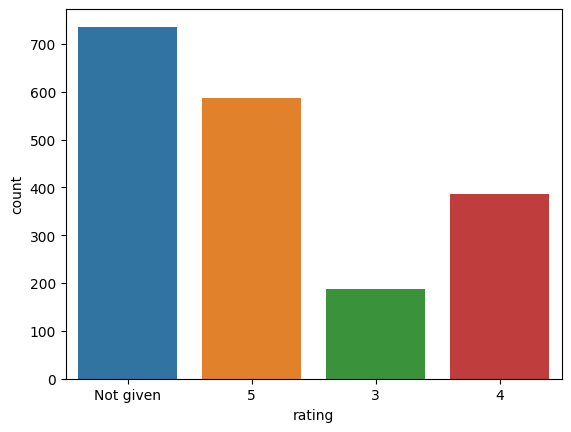

In [ ]:
# Rating of Orders
sns.countplot(data=df, x='rating', hue='rating')
plt.show()

#### Rating Observations:
* rating range can be to 5, but no customer has rated the orders below a 3.
* There was 736 orders that were not given. This is the largest proportion of total orders.
* If the customer was willing to rate the order, they were more likely to give a rating of 5

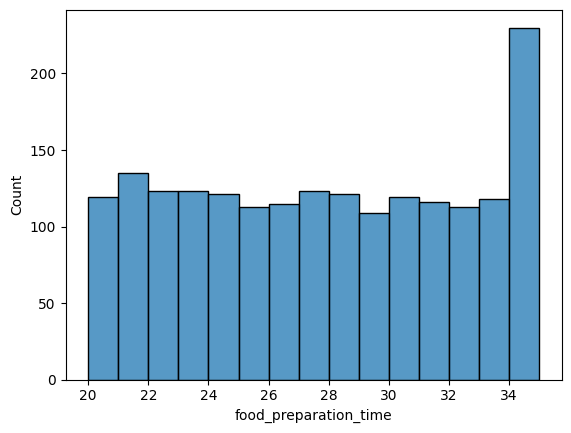

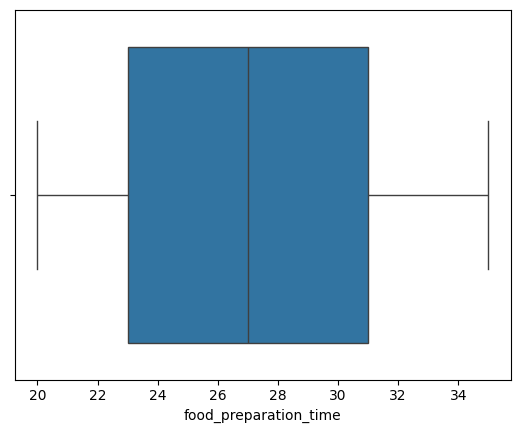

In [ ]:
# Food Preperation time for orders
sns.histplot(data=df,x='food_preparation_time', binwidth=1, stat="count")
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Food Preparation Time Observations:
* Food preperation appears to be slightly skewed to the right as seen by the boxplot. The whiskers length on the right side is 1 minute longer than the whisker on the right
This make sense has there seems to be sharp rise in orders taking 35 minutes for food preperation time
* There is no outliers represented on the boxplot.
* The histplot bins have counts averaging around 130 between 30 and 34 minutes. The last bin at 35 minutes has a count over 200.

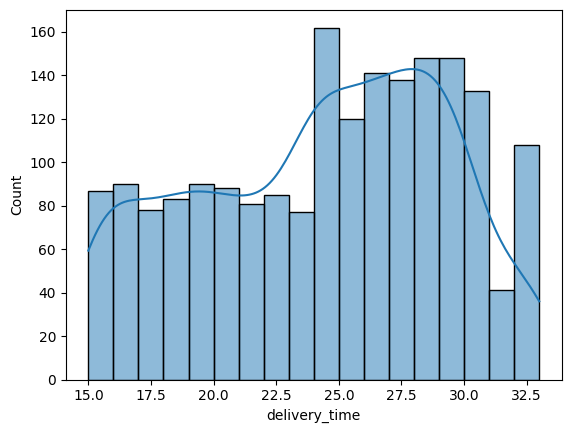

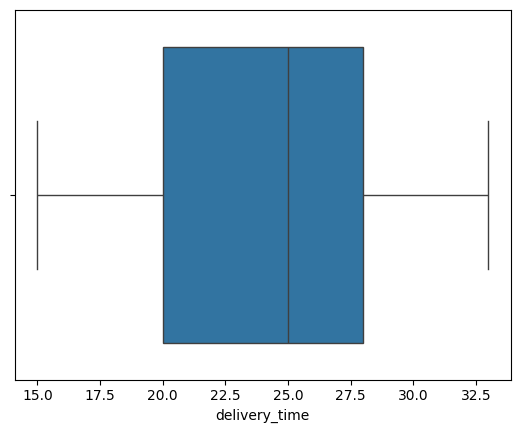

In [ ]:
# Delivery_time for Orders
sns.histplot(data=df, x='delivery_time', binwidth = 1, kde=True, stat="count")
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

#### Delivery Time Observations:
* delivery time according to the histplot indicates slightly skewed data to the left. This is seen as well with the box plot with the left whisker being slightly longer.
* The most common delivery times seem to be between 24 and 25 minutes


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Top 5 restaurants
df.restaurant_name.value_counts(dropna=False)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


#### Observations:
* Orders have been placed at 178 restaurants. Of those 178 restaurants, the top 5 restaurants in terms of the number of orders is:
1. Shake Shack	-- 219
2. The Meatball Shop --	132
3. Blue Ribbon Sushi --	119
4. Blue Ribbon Fried Chicken --	96
5. Parm	-- 68

* The highest amount of orders is Shake Shack with 219 orders and the 5th most ordered restaurant is Parm with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

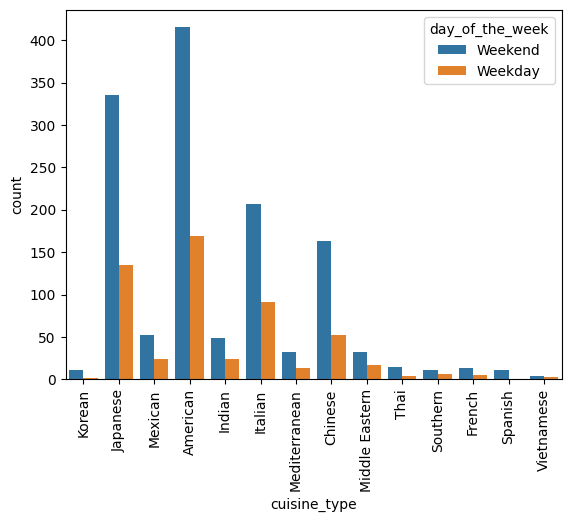

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


In [ ]:
# Populare Cuisine on Weekends
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90);
plt.show()

# filter for weekends
weekend_df = df[df['day_of_the_week'].isin(['Weekend'])]

# count occurences of cuisine type
cuisine_count = weekend_df['cuisine_type'].value_counts()
cuisine_count

In [ ]:
len(cuisine_count)

14

#### Observations:
* There are 14 different categories of cuisine ordered on the weekend.
* The top 5 ordered cuisines are as follows:
  1. American	415
  2. Japanese	335
  3. Italian	207
  4. Chinese	163
  5. Mexican	53

* The highest amount of orders for cuisines on the weekend is American with 415 orders and the 5th highest orders is Mexican with 53 orders.
* The least popular cuisine for the weekends is vietamese with only 4 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Filter orders > $20
orders_over_20 = df.loc[df['cost_of_the_order']>20].shape[0]
print('The total number of orders greater than 20 dollars is:', orders_over_20)

# Total number of orders
total_orders = df.shape[0]
print('The total orders placed is:', total_orders)

# Percentage of orders that cost more than $20
percent_over_20 = (orders_over_20/total_orders) * 100
print(str(round(percent_over_20, 2))+ "% of all orders cost more than $20")

The total number of orders greater than 20 dollars is: 555
The total orders placed is: 1898
29.24% of all orders cost more than $20


#### Observations:
* 29.24% of all orders is greater than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


In [ ]:
# Confirm Mean of Delivery Time
df.delivery_time.mean()

24.161749209694417

#### Observations:
* Based on the chart above,  the mean delivery time is  24.16 minutes with a minimum delivery time of 15 minutes and a max delivery time of 33 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Top 3 customers

order_count = df['customer_id'].value_counts().reset_index()
order_count

,customer_id,count
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7
...,...,...
1195,385426,1
1196,254913,1
1197,289597,1
1198,74412,1


In [ ]:
# Of the customers that only ordered once, how many didn't leave a rating?

# number of orders per customer
order_by_customers = df.groupby('customer_id').size().reset_index(name='count')
# check for customers who have only ordered once and their rating
single_order_customer = order_by_customers[order_by_customers['count']==1]
print("Number of Single Order Customers is:", len(single_order_customer))
# merge df to see if they left any ratings
ratings_check = single_order_customer.merge(df[['customer_id', 'rating']], on='customer_id', how='left')
# check to see if they left no rating and as such was labeled NaN
no_rating_customer = ratings_check[ratings_check['rating'] == 'Not given']
no_rating_customer
print("Number of Single Order Customers who didn't rate:", len(no_rating_customer))

Number of Single Order Customers is: 784
Number of Single Order Customers who didn't rate: 297


#### Observations:
* The 3 top customers who will recieve the 20% voucher is as follows:
1. 52832	13-orders
2. 47440	10-orders
3. 83287	9-orders

* The first place customer has 13 orders, second place has 10 orders and third place has 9 orders. There are 2 other customers that are closely following behind.

* Looking at the customers and the number of orders, I wanted to look at the people who only used the app once. Of the 784 who only only ordered once, 297 never left a rating. That is almost half of the people. Perhaps we need a voucher to entice both a rating and an additional order?


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
df.head(1)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20


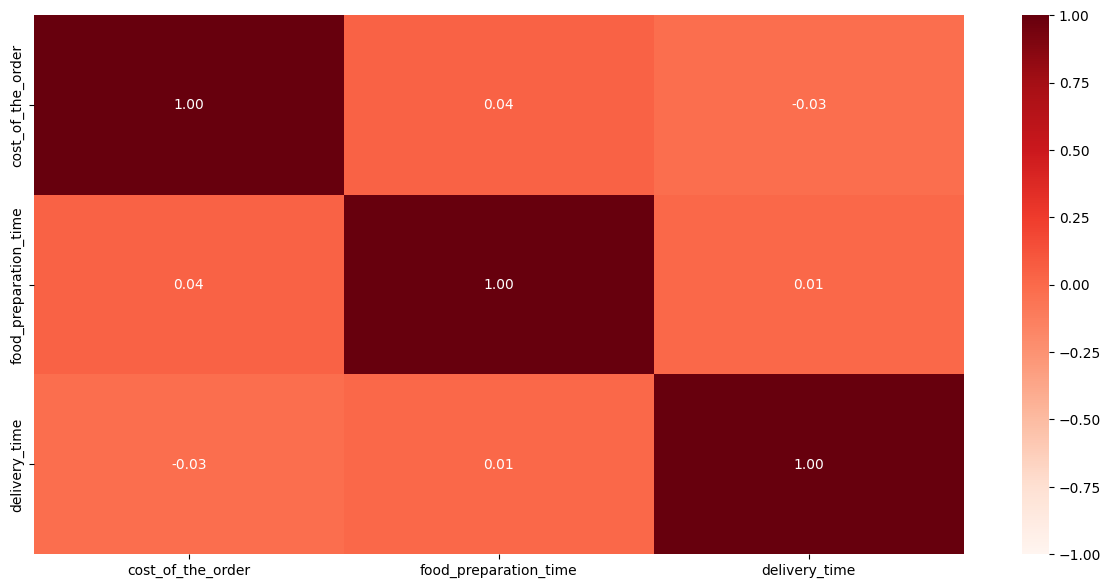

In [ ]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Reds")
plt.show()

#### Observations:

* There seems to be no huge correlation between cost_of_the_order, food_preperation_time and delivery_time according to the heatmap.

However, knowing about the industry I might conclude:

* There seems to be a slight positive correlation between cost of the order and the food preperation time (0.04). More labor intensive food tends to be higher in price. This can be seen with the slight correlation. --Should look into this more


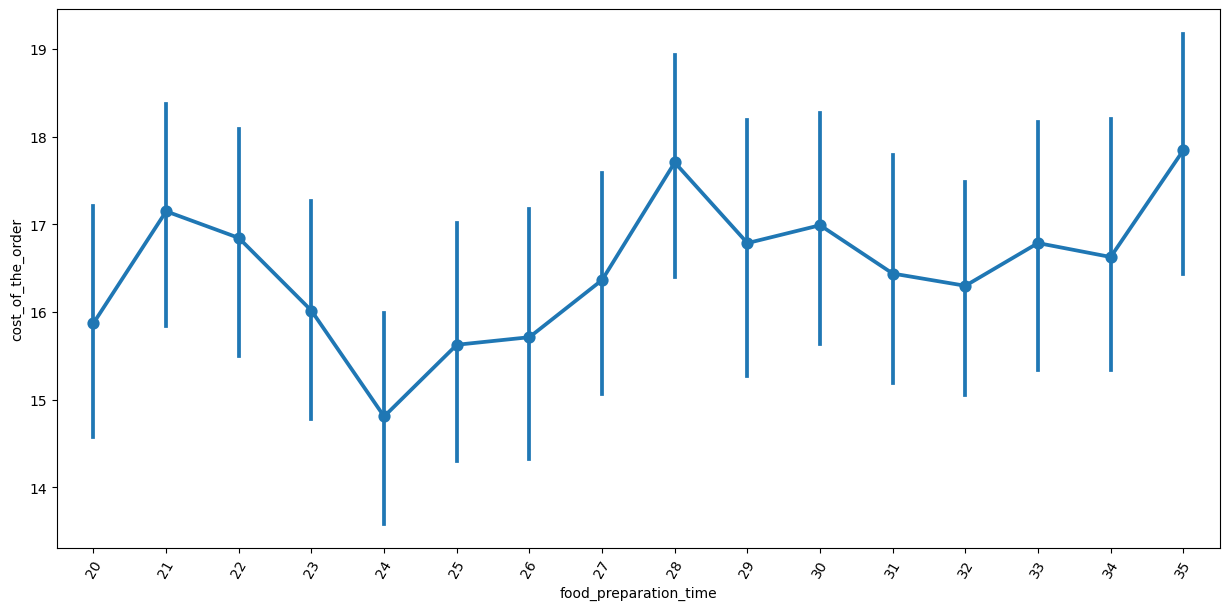

In [ ]:
plt.figure(figsize=(15,7))
sns.pointplot(x = "food_preparation_time", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 60)
plt.show()

#### Observations:
* It seems overall, as the food preperation time increasese, so does the cost of food. This can be seen from the gradual increase from 20min to 35min. There seems to be a sweet spot of 24 minutes for food prep time compared to cost.
* On average, the cheapest orders cost about $15 and take 24 minutes to make
* There seems to be a slight correlation, but is it significant enough to be of value, not so sure.


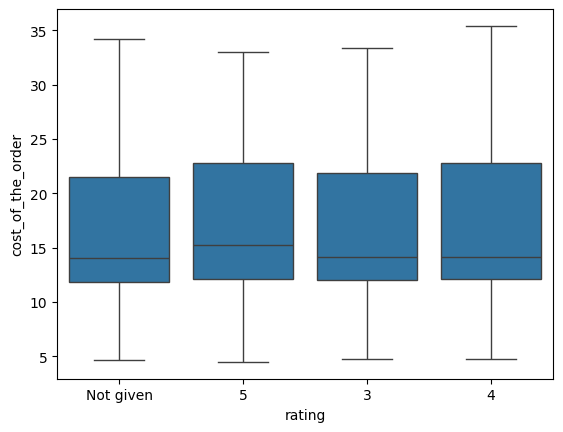

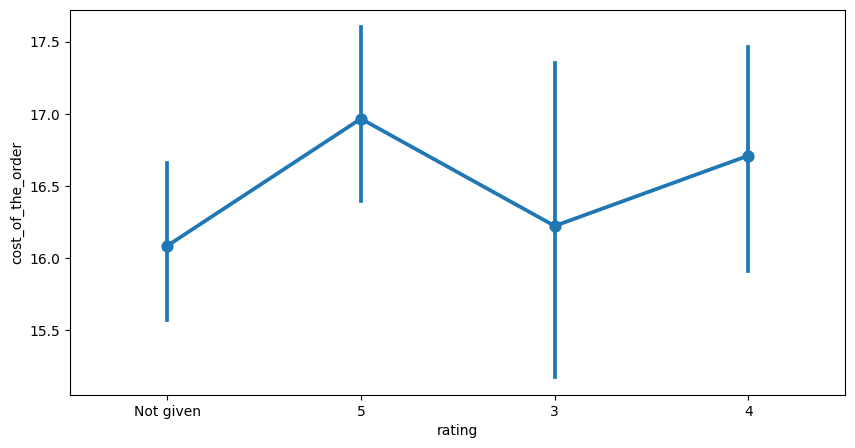

In [ ]:
# Analyze relationship between rating and cost of order
sns.boxplot(data=df, x='rating', y ='cost_of_the_order')
plt.figure(figsize=(10,5))
sns.pointplot(data=df,x='rating', y='cost_of_the_order')
plt.show()



#### Observations:
* Orders that recieve a 5.0 tend to be more expensive with the minimum cost being about 16.25 and an average cost of about 17.
* Orders that recieve a 3.0 tend to be cheaper with minimum cost at 15.25 and average being about 16.25 which is 0.75 less on average in comparison to 5.0 rated orders.
* It seems the customers who are willing to spend the most on food also seems the most willing to rate their orders the average for 5 rated orders seems to be higher than any of the other ratings.

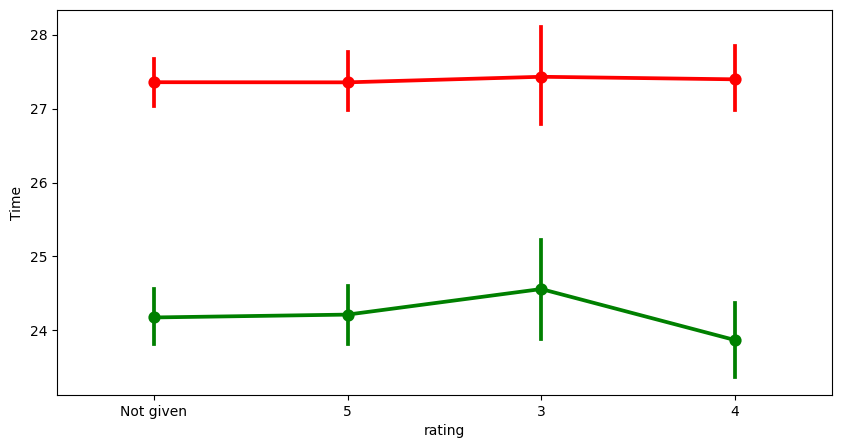

In [ ]:
# Analyze relationship between rating and time
plt.figure(figsize=(10,5))
sns.pointplot(data=df,x='rating', y='delivery_time', color='green')
sns.pointplot(data=df,x='rating', y='food_preparation_time', color='red')
plt.ylabel('Time')
plt.show()

#### Observations:
* The food_preperation_time indicated in red is flat showing that the food_preperation_time does not affect the customer rating
* The delivery_time indicated in green shows that there might be some effect to the rating by slower delivery times but as the 3.0 rating's variablity in time overlaps with the delievery times for orders recieving 4.0 and 5.0, I don't believe it has a massive effect.

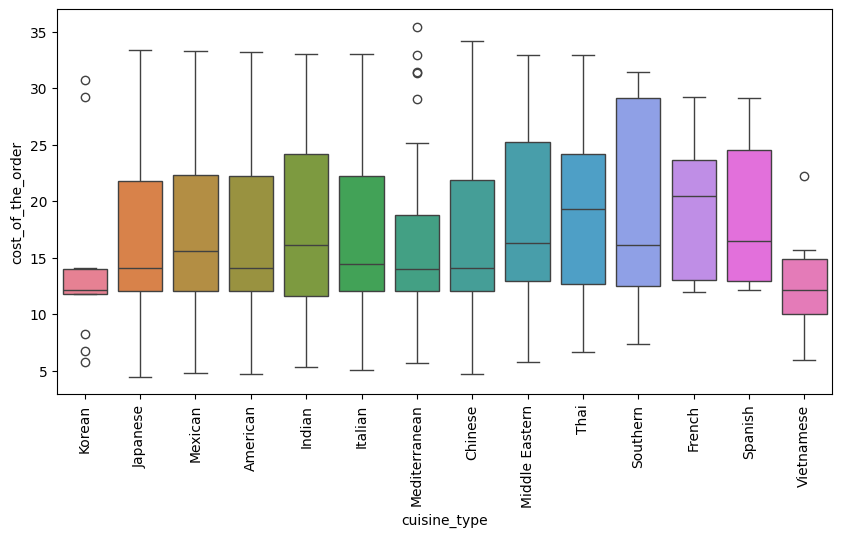

In [ ]:
# Analyze relationship between cost of the order and cuisine
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cuisine_type', y='cost_of_the_order', hue='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observations:
 * Most cusines cost about 12-23 dollars per order.
 * Vietnamese on average has lower order amounts than the other cuisines
 * Korean, Mediteranean and Vietmese contain the most outliers
 * Since order size can vary so much with the amount of people being fed to amount that people eat varying greatly, I believe these outliers are acceptable


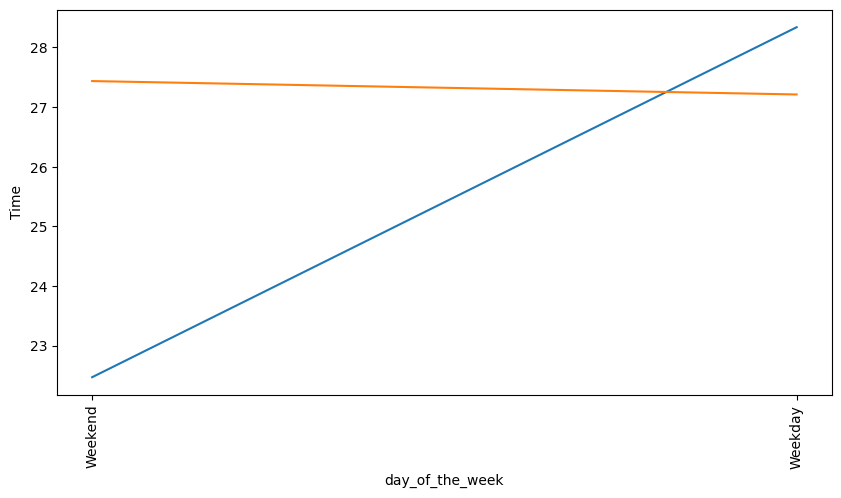

In [ ]:
# Analyze day of the week and delivery time
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='day_of_the_week', y='delivery_time', errorbar=None,)
sns.lineplot(data=df,x='day_of_the_week', y='food_preparation_time', errorbar=None,)
plt.xticks(rotation=90)
plt.ylabel('Time')
plt.show()

#### Observations:
* Looking at the relationship between the days of the week and the times it takes to prep the food and deliver the food, you can see that the time to prep orders remains steady as indicated by the orange line. This shows that the day of the week doesn't play a part in the food prep time.

* The delivery time from the weekend to the weekday shows there is some variablity in delivery time between the days of the week. Orders on weekends tend to take about 5 minutes less as indicated by the blue line.


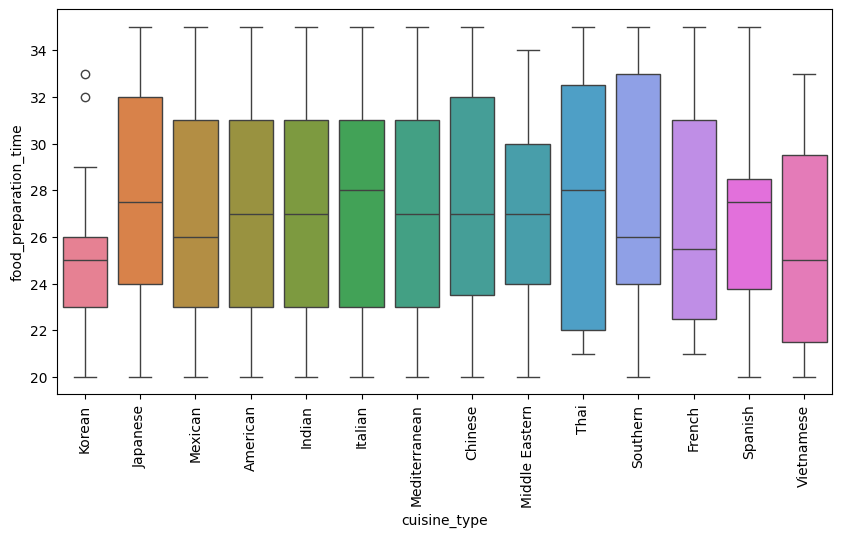

In [ ]:
# Analyze relationship between cusine and food prep
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cuisine_type', y='food_preparation_time', hue='cuisine_type')
plt.xticks(rotation=90)
plt.show()

#### Observations:
* minimum food prep time for majority of cuisine is about 20 minutes. This excludes Thai and French takes an extra minute
* 75% of food across cuisines takes 31-32 minutes to prepare. This excludes Thai and Southern cuisines that take a little longer to prepare.
* Thai has the most variablity in food prep times
* Korean has the least variablity in food prep times

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# Conver to int
df_rated['rating'] = df_rated['rating'].astype('int')
df_rated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


In [ ]:
# Find restaurants with rating count and average rating count
grouped_df=  df_rated.groupby('restaurant_name').agg(rating_count=('rating','count'), avg_rating=('rating', 'mean')).reset_index()
sorted_df = grouped_df.sort_values(by='rating_count', ascending=False).reset_index(drop=True)
sorted_df.shape


(156, 3)

In [ ]:
sorted_df.head(20)

,restaurant_name,rating_count,avg_rating
0,Shake Shack,133,4.28
1,The Meatball Shop,84,4.51
2,Blue Ribbon Sushi,73,4.22
3,Blue Ribbon Fried Chicken,64,4.33
4,RedFarm Broadway,41,4.24
5,Parm,39,4.13
6,RedFarm Hudson,34,4.18
7,TAO,28,4.36
8,Rubirosa,24,4.12
9,Nobu Next Door,23,4.35


In [ ]:
# Filter for restaurants with more than 50 ratings and an average rating greater than 4

filtered_restaurants = sorted_df[(sorted_df['rating_count']>50) & (sorted_df['avg_rating']>4.0)]
filtered_restaurants

,restaurant_name,rating_count,avg_rating
0,Shake Shack,133,4.28
1,The Meatball Shop,84,4.51
2,Blue Ribbon Sushi,73,4.22
3,Blue Ribbon Fried Chicken,64,4.33


#### Observations:
* There is 4 restaurants that will recieve the promotional offer. These are as follows:

  1.  **Shake Shack**       | 133 ratings  | 4.28 avg rating
  2.	**The Meatball Shop** | 84	ratings  | 4.51 avg rating
  3.	**Blue Ribbon Sushi**	| 73 ratings   | 4.212 avg rating
  4.	**Blue Ribbon Fried Chicken** | 64	ratings| 4.33 avg rating

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [ ]:
#  Net Revenue per individual order is cost_of_the_order - company_commision
#  Company Commission

# automate company revenue calculation
def company_revenue(x):
  # company revenue when cost of order is above $20
  if x > 20:
    return x * 0.25
  # company revenue when cost of order is above $5 and $20 or less
  elif x > 5:
    return x * 0.15
  # company recieves no commision if order cost is under $5
  else:
    return x * 0


# populate new column Company_Revenue
df['Company_Revenue'] = df['cost_of_the_order'].apply(company_revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Company_Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74


In [ ]:
# sum Company_Revenue column for total revenue
total_company_revenue = df.Company_Revenue.sum()
print("Food Hubs current revenue based on thier commission structure is:", round(total_company_revenue, 3), 'dollars')

Food Hubs current revenue based on thier commission structure is: 6166.303 dollars


In [ ]:
# Group Revenue by Day of the Week
revenue_by_day = df.groupby('day_of_the_week')['Company_Revenue'].sum()
revenue_by_day

,Company_Revenue
day_of_the_week,
Weekday,1754.33
Weekend,4411.97


In [ ]:
# Display Revenue based on Day of the Week
percentage_rev = (revenue_by_day/ total_company_revenue) * 100

combined_rev_df = pd.DataFrame({
    'Company_Revenue': revenue_by_day,
    '% Total_Revenue' : round(percentage_rev, 2)
})

combined_rev_df

,Company_Revenue,% Total_Revenue
day_of_the_week,,
Weekday,1754.33,28.45
Weekend,4411.97,71.55


#### Observations:
* Total Revenue for Food Hub is 6166.303 dollars
* Nearly 3/4 of it has been earned during the weekends while the rest was earned during the weekday

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Total_Time = 'food_preparation_time' + 'delivery_time'

df['Total_Time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Company_Revenue,Total_Time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74,49


In [ ]:
# total orders
total_orders = df.shape[0]
total_orders

1898

In [ ]:
# find orders with Total_Time > 60 minutes
slow_time = df[df['Total_Time']> 60].sort_values(by='Total_Time', ascending=False)
# checking to ensure filter kept only orders > 60
slow_time.tail(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Company_Revenue,Total_Time
1664,1477770,59742,J. G. Melon,American,7.33,Weekday,Not given,31,30,1.10,61
1090,1477727,333311,Blue Ribbon Sushi Izakaya,Japanese,21.93,Weekend,Not given,35,26,5.48,61
1049,1477409,146588,Shake Shack,American,9.07,Weekday,3,35,26,1.36,61
1694,1477606,39406,RedFarm Broadway,Chinese,9.27,Weekday,4,32,29,1.39,61
897,1477374,177078,Lantern Thai Kitchen,Thai,32.93,Weekend,Not given,34,27,8.23,61


In [ ]:
# Confirm that orders are all over 60 minutes
slow_time['Total_Time'].unique()

array([68, 67, 66, 65, 64, 63, 62, 61])

In [ ]:
# See how many orders had a time over 60 minutes
slow_time_order_count = slow_time.shape[0]
slow_time_order_count

200

In [ ]:
# percentage of orders > 60

percentage_orders_over_60 = (slow_time_order_count / total_orders) * 100
print(round(percentage_orders_over_60, 2), "% of orders take over 60 minutes of total time to get to the customer")

10.54 % of orders take over 60 minutes of total time to get to the customer


#### Observations:
* 10.54% of orders take longer than 60 minutes to get to the customer after being ordered. Of the 1898 orders placed that correlated to 200 orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Group orders by delivery time based on weekdays and weekends.
# get avg of each

delivery_time_mean = df.groupby("day_of_the_week")["delivery_time"].mean()
delivery_time_mean

,delivery_time
day_of_the_week,
Weekday,28.34
Weekend,22.47


In [ ]:
print("The average delivery time on Weekdays is around", round(delivery_time_mean.Weekday, 2), 'minutes')
print("The average delivery time on Weekends is around", round(delivery_time_mean.Weekend, 2), 'minutes')
print("This shows that on Weekends, the average is about", round(delivery_time_mean.Weekday - delivery_time_mean.Weekend, 2),"minutes faster than Weekdays")

The average delivery time on Weekdays is around 28.34 minutes
The average delivery time on Weekends is around 22.47 minutes
This shows that on Weekends, the average is about 5.87 minutes faster than Weekdays


#### Observations:
* The average delivery time on Weekdays is 28.34 minutes while delivery time on Weekends was 22.47 minutes. This was about 6 minutes faster during weekends than during weekdays deliveries.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

For this project, we assisted the FoodHub app with analyzing their customer order data from their online portal to better understand restaurant demand and ratings and seeing what could be done to enchance the customer experience.

From the data we discovered:

* Of 1898 orders made by 1200 different customers, there were 14 different cuisines with the 4 most popular being American, Japanese, Italian and Chinese from a total of 178 different restaurants.
* There were significantly more orders placed during the weekends then the weekdays and delivery times during the weekends tended to be faster on average by about 6 minutes
* Ratings tend to be more favorable when the cost of the food leans towards the higher prices.
* 10% of orders take over 60 minutes to arrive at customer location.
* 736 orders went unrated. Of those unrated orders, 297 of those were first time orders.

### Recommendations:

* Continue to add restaurants from the popular cuisine types
* Investigate the reasoning behind the slower delivery times on the weekdays.
* Explore ways to incentivize users to order more on weekdays via promotions. Weekends are popular, but try to figure out ways to balance demand throughout the week.
* Incentivize promotions for customers to spend over $20 to increase the revenue
* Send follow up emails with small discount for ratings. Get people to return to the service
* The data set is still small. Collecting more data will help to establish a better understanding on how time, cuisine and cost might effect both the ratings of the customer and their user experience.
* Consider adding additional data fields such as a rating for the user's overall experience. Seperate the restaurant rating and the user rating to better understand why 784 of the 1200 registered customers have only ordered once.


---